# Behavioral Analysis

## Imports and functions

In [1]:
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from unityvr.preproc import logproc as lp
from unityvr.analysis import posAnalysis
from unityvr.viz import viz, utils

### Util Functions

In [2]:
def select_file_path(prompt="Select File", initialdir=r"Z:\FlyVR\FlyVR data"):
    root = tk.Tk()
    root.withdraw()
    root.attributes("-topmost", 1)

    file_path_str = filedialog.askopenfilename(title=prompt, initialdir=initialdir)
    if file_path_str == "":
        print("File selection canceled")
        return None
    file_path = Path(file_path_str)
    return file_path

In [3]:
def select_folder_str(prompt="Select Folder"):
    root = tk.Tk()
    root.withdraw()
    root.attributes("-topmost", 1)

    dir_path_str = filedialog.askdirectory(title=prompt)
    return dir_path_str

### Plotting Functions

In [4]:
def plot_dark_stim():
    pass

## Select data files

In [5]:
# Select unity vr file from the dark trial segment
dark_stim_path = select_file_path(prompt="Select dark stim file")

In [6]:
# Select unity vr file from the grating trial segment
grating_stim_path = select_file_path(prompt="Select grating stim file")

In [7]:
# Select unity vr file from the closed loop trial segment
closed_loop_stim_path = select_file_path(prompt="Select closed loop stim file")

In [8]:
print("Data Files Chosen:")
print(f"Dark stimuli file: {dark_stim_path}")
print(f"Grating stimuli file: {grating_stim_path}")
print(f"Closed loop stimuli file: {closed_loop_stim_path}")

Data Files Chosen:
Dark stimuli file: Z:\FlyVR\FlyVR data\Edwin\2023-07-24\4-\Log_2023-07-24_11-41-17.json
Grating stimuli file: Z:\FlyVR\FlyVR data\Edwin\2023-07-24\4-\Log_2023-07-24_11-46-34.json
Closed loop stimuli file: Z:\FlyVR\FlyVR data\Edwin\2023-07-24\4-\Log_2023-07-24_11-52-18.json


## Parse Data

In [9]:
uvr_dict = {
    'dark_stim': lp.constructUnityVRexperiment(str(dark_stim_path.parent), dark_stim_path.name),
    'grating_stim': lp.constructUnityVRexperiment(str(grating_stim_path.parent), grating_stim_path.name),
    'closed_loop_stim': lp.constructUnityVRexperiment(str(closed_loop_stim_path.parent), closed_loop_stim_path.name)
}

correcting for Unity angle convention.
correcting for Unity angle convention.
correcting for Unity angle convention.


## Show Length of Trials

In [10]:
for trial_type, uvr in uvr_dict.items():
    length = uvr.posDf.iloc[-1]['time']
    print(f"{trial_type} trial took {length:.3f} seconds to run ({length//60:.0f} minutes and {length%60:.3f} seconds)")


dark_stim trial took 299.256 seconds to run (4 minutes and 59.256 seconds)
grating_stim trial took 299.253 seconds to run (4 minutes and 59.253 seconds)
closed_loop_stim trial took 299.280 seconds to run (4 minutes and 59.280 seconds)


In [11]:
uvr_dict['dark_stim'].posDf.iloc[-1]['time']

299.2555847167969

## Create Plots

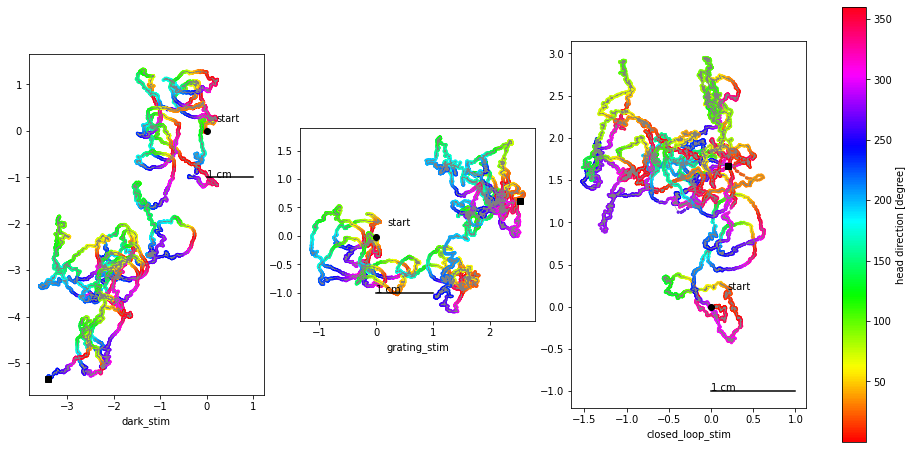

In [12]:
convfac = 10 # dc2cm

fig, axd = plt.subplot_mosaic("abcd", figsize=(15, 8),
                              gridspec_kw={'width_ratios':[1,1,1,0.1]})
for index, (trial_type, uvr) in zip("abc", uvr_dict.items()):
    axd[index].plot(uvr.posDf.x*convfac,uvr.posDf.y*convfac,color='grey', linewidth=0.5)
    cb = axd[index].scatter(uvr.posDf.x*convfac,uvr.posDf.y*convfac,s=5,c=uvr.posDf.angle, cmap='hsv')
    axd[index].plot(uvr.posDf.x[0]*convfac,uvr.posDf.y[0]*convfac,'ok')
    axd[index].text(uvr.posDf.x[0]*convfac+0.2,uvr.posDf.y[0]*convfac+0.2,'start')
    axd[index].plot(uvr.posDf.x.values[-1]*convfac,uvr.posDf.y.values[-2]*convfac,'sk')
    
    # Check if fly path is very large
    path_length = np.ptp(axd[index].get_xlim())
    path_height = np.ptp(axd[index].get_ylim())
    if (path_length > 1000) or (path_height > 1000):
        utils.plotScaleBar(axd[index],1000,(0,-500),'1000 cm')
    else:
        utils.plotScaleBar(axd[index],1,(0,-1),'1 cm')
    axd[index].set_xlabel(trial_type)
    axd[index].set_aspect('equal')
plt.colorbar(cb,cax=axd['d'], label='head direction [degree]')

In [13]:
dir_path_str = select_folder_str()
filename = "trial_" + dark_stim_path.name.split('_')[1] + ".pdf"
fig.savefig(Path(dir_path_str, filename), dpi=600)